Partial Code adapted from https://github.com/patrickcgray/open-geo-tutorial

In [55]:
from IPython.display import Audio, display
from timeit import default_timer as timer
start = timer()
def color_stretch(image, index):
    colors = image[:, :, index].astype(np.float64)
    for b in range(colors.shape[2]):
        colors[:, :, b] = rasterio.plot.adjust_band(colors[:, :, b])
    return colors
def alert():
  global start
  end= timer()
  print("\n\nDuration in minutes : " +  str((end - start)/60) + " minutes." )
  display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))

# Preparing Dataset

#### Cutting images for faster process

In [56]:
# 0 to  10980 for this img_data
#training
#xmin = 6700
#xmax = 6900
#ymin = 6700
#ymax = 6900
xmin = 6700
xmax = 7000
ymin = 6600
ymax = 6900
xmin_test = 6500
xmax_test = 6700
ymin_test = 6750
ymax_test = 6950

shapemin = min(xmin,ymin,xmin_test,ymin_test)
shapemax = max(xmax,ymax,xmax_test,ymax_test)
print(shapemin)
shapemax

6500


7000

In [57]:
import rasterio
from rasterio.mask import mask
import geopandas as gp
import numpy as np
import shapely
from shapely import geometry
from shapely.geometry import shape, Point, LineString, Polygon , mapping
import matplotlib.pyplot as plt
from rasterio.plot import show
import pyproj
from pyproj import CRS
import fiona
import os # we need os to do some basic file operations
import re
from rasterio.plot import adjust_band
from rasterio.plot import reshape_as_raster, reshape_as_image
import matplotlib.pyplot as plt
from rasterio.plot import show
from pyproj import transform
from pyproj import Proj
import ast

In [58]:
# create a products directory within the data dir which won't be uploaded to Github
img_dir = './data/'

# check to see if the dir it exists, if not, create it
if not os.path.exists(img_dir):
    os.makedirs(img_dir)

# filepath for image we're writing out
img_fp = img_dir + 'sentinel_bands_img_data_1.tif'

In [59]:
full_dataset = rasterio.open(img_fp)
img_rows, img_cols = full_dataset.shape
img_bands = full_dataset.count
print(full_dataset.shape) # dimensions
print(full_dataset.count) # bands

(10980, 10980)
4


In [60]:
with rasterio.open(img_fp) as src:
    # may need to reduce this image size if your kernel crashes, takes a lot of memory
    img = src.read()[:,  :  ,   :  ]

# Take our full image and reshape into long 2d array (nrow * ncol, nband) for classification


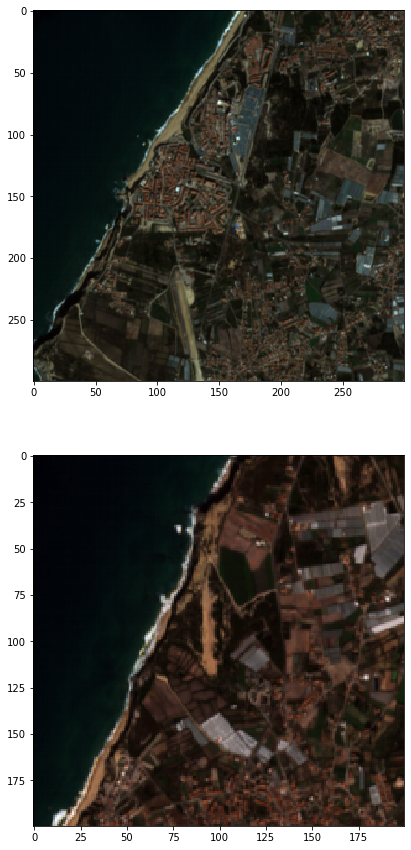

In [61]:
img_train = img[:, xmin : xmax ,  ymin : ymax ]
img_test = img[:, xmin_test : xmax_test ,  ymin_test : ymax_test ]
reshaped_img_train = reshape_as_image(img_train)
reshaped_img_test = reshape_as_image(img_test)

fig, axs = plt.subplots(2,1,figsize=(15,15))
img_stretched_train = color_stretch(reshaped_img_train, [2, 1, 0])
axs[0].imshow(img_stretched_train)

img_stretched_test = color_stretch(reshaped_img_test, [2, 1, 0])
axs[1].imshow(img_stretched_test)

In [1]:
#TODO

In [90]:
alert() # audio alert



Duration in minutes : 20.00997302 minutes.
